In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-sales-dataset/amazon.csv


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

plt.style.use('ggplot')

import nltk
nltk.download("averaged_perceptron_tagger_eng")
nltk.download('maxent_ne_chunker')
nltk.download('maxent_ne_chunker_tab')
nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.
[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [15]:
#read  data
df = pd.read_csv('../input/amazon-sales-dataset/amazon.csv')

In [16]:
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [17]:
df['review_content'].values[1]

"I ordered this cable to connect my phone to Android Auto of car. The cable is really strong and the connection ports are really well made. I already has a Micro USB cable from Ambrane and it's still in good shape. I connected my phone to the car using the cable and it got connected well and no issues. I also connected it to the charging port and yes it has Fast Charging support.,It quality is good at this price and the main thing is that i didn't ever thought that this cable will be so long it's good one and charging power is too good and also supports fast charging,Value for money, with extra length👍,Good, working fine,Product quality is good,Good,very good,Bought for my daughter's old phone.Brand new cable it was not charging, I already repacked and requested for replacement.I checked again, and there was some green colour paste/fungus inside the micro USB connector. I cleaned with an alcoholic and starts working again.Checked the ampere of charging speed got around 1400ma-1500ma - 

In [19]:
print(df.shape)

(1465, 16)


## Quick EDA

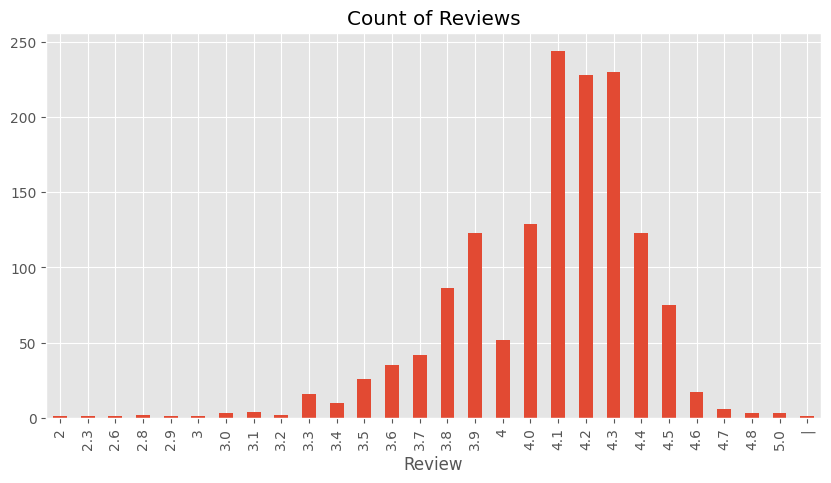

In [20]:
ax = df['rating'].value_counts().sort_index() \
.plot(kind='bar', 
      title='Count of Reviews', 
      figsize=(10,5))
ax.set_xlabel('Review')
plt.show()

## Filter for garment items (need to add this)

## Basic NLTK

In [23]:
example = df['review_content'][50]
print(example)

I am using this on an old Mac Mini, since the Broadcom proprietary drivers aren't available and the replacement B43 drivers don't allow for sufficient download speeds, at least in my experience. I got this device up and running with Ubuntu 22.04 with Linux 5.15.0-56-generic.Google search for "morrownr/8821au-20210708" and use the driver on Github. I'm using the product "TP-Link AC600" btw. If you are using the other variant sold on Amazon, use lsusb and find out which network interface you are going to have to install drivers for. GIYF.I will admit, this is probably going to be hard for someone who is not generally comfortable with a shell, bash for example. But even though I had never used dkms or iw before, the Github repo along with the build tools available in the jammy repo made it easy enough to get the device working (read the GitHub Readme).To be sure I first got the drivers working in a local Ubuntu VM using Guest Additions to connect to the USB device directly from the guest 

In [24]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I', 'am', 'using', 'this', 'on', 'an', 'old', 'Mac', 'Mini', ',']

In [37]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('am', 'VBP'),
 ('using', 'VBG'),
 ('this', 'DT'),
 ('on', 'IN'),
 ('an', 'DT'),
 ('old', 'JJ'),
 ('Mac', 'NNP'),
 ('Mini', 'NNP'),
 (',', ',')]

In [43]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint

<bound method Tree.pprint of Tree('S', [('I', 'PRP'), ('am', 'VBP'), ('using', 'VBG'), ('this', 'DT'), ('on', 'IN'), ('an', 'DT'), ('old', 'JJ'), Tree('ORGANIZATION', [('Mac', 'NNP'), ('Mini', 'NNP')]), (',', ','), ('since', 'IN'), ('the', 'DT'), Tree('ORGANIZATION', [('Broadcom', 'NNP')]), ('proprietary', 'JJ'), ('drivers', 'NNS'), ('are', 'VBP'), ("n't", 'RB'), ('available', 'JJ'), ('and', 'CC'), ('the', 'DT'), ('replacement', 'NN'), ('B43', 'NNP'), ('drivers', 'NNS'), ('do', 'VBP'), ("n't", 'RB'), ('allow', 'VB'), ('for', 'IN'), ('sufficient', 'JJ'), ('download', 'NN'), ('speeds', 'NNS'), (',', ','), ('at', 'IN'), ('least', 'JJS'), ('in', 'IN'), ('my', 'PRP$'), ('experience', 'NN'), ('.', '.'), ('I', 'PRP'), ('got', 'VBD'), ('this', 'DT'), ('device', 'NN'), ('up', 'RB'), ('and', 'CC'), ('running', 'VBG'), ('with', 'IN'), Tree('ORGANIZATION', [('Ubuntu', 'NNP')]), ('22.04', 'CD'), ('with', 'IN'), Tree('PERSON', [('Linux', 'NNP')]), ('5.15.0-56-generic.Google', 'JJ'), ('search', 'NN')

## VADER

In [47]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [51]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [54]:
sia.polarity_scores('This is the worst day of my life!')

{'neg': 0.386, 'neu': 0.614, 'pos': 0.0, 'compound': -0.6588}

In [57]:
sia.polarity_scores(example)

{'neg': 0.055, 'neu': 0.848, 'pos': 0.098, 'compound': 0.9846}

In [63]:
#run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review_content']
    myid = row['product_id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/1465 [00:00<?, ?it/s]

In [70]:
pd.DataFrame(res).T

,neg,neu,pos,compound
B07JW9H4J1,0.032,0.744,0.224,0.9033
B098NS6PVG,0.010,0.821,0.169,0.9853
B096MSW6CT,0.000,0.641,0.359,0.6808
B08HDJ86NZ,0.028,0.800,0.172,0.8316
B08CF3B7N1,0.116,0.719,0.165,0.9809
...,...,...,...,...
B08L7J3T31,0.016,0.763,0.221,0.9468
B01M6453MB,0.122,0.714,0.164,0.7876
B009P2LIL4,0.083,0.718,0.199,0.9698
B00J5DYCCA,0.061,0.882,0.057,-0.2960
